In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm_notebook as tqdm
from itertools import product

# Continous Scenario

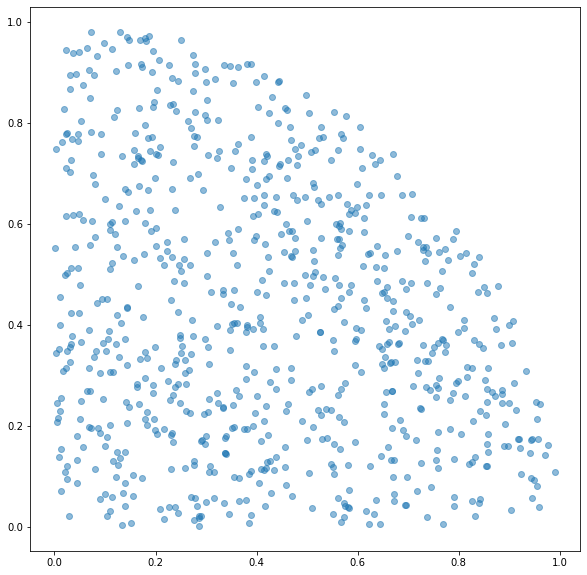

In [2]:
sample_size = 1_000

df = pd.DataFrame([(x, y) for x, y in np.random.rand(sample_size, 2) if np.sqrt(x**2+y**2) < 1], columns=['x', 'y'])

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x=df.x, y=df.y, alpha=0.5)
ax.set_aspect('equal')
plt.show()

C:\Users\chiawwoo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


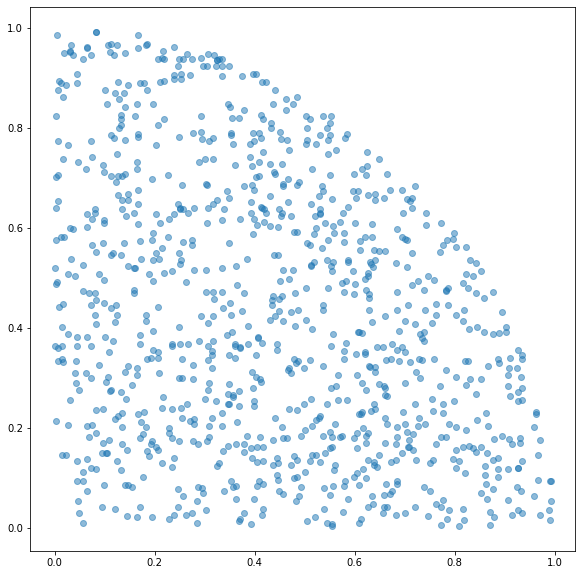

In [3]:
def generate_x_given_y(y):
    return np.random.rand() * np.sqrt(1 - y**2)

def generate_y_given_x(x):
    return np.random.rand() * np.sqrt(1 - x**2)

def gibb_samples():
    x = np.random.random()
    
    while True:
        y = generate_y_given_x(x)
        yield (x, y)

        x = generate_x_given_y(y)
        yield (x, y)
        
gen = gibb_samples()
simulated_samples = [next(gen)for _ in tqdm(range(int(sample_size)))]
df = pd.DataFrame(simulated_samples, columns=['x', 'y'])

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(x=df.x, y=df.y, alpha=0.5)
ax.set_aspect('equal')
plt.show()

# Discrete Scenario

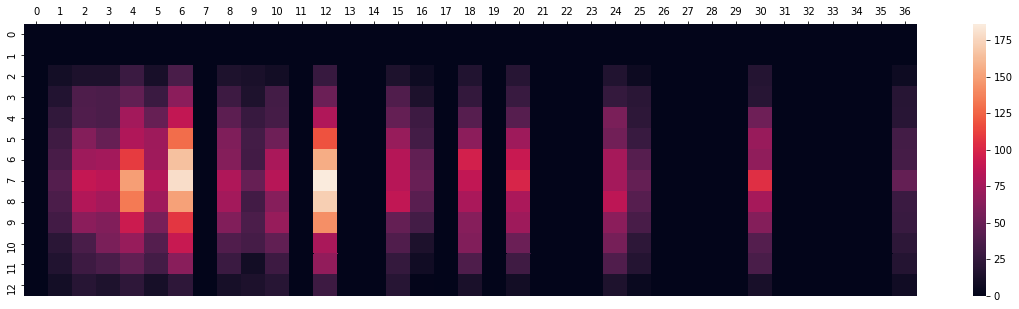

In [4]:
pdf_add = pd.Series([x+y for x, y in product(range(1, 7), range(1, 7))]).value_counts(normalize=True).sort_index()
pdf_mult = pd.Series([x*y for x, y in product(range(1, 7), range(1, 7))]).value_counts(normalize=True).sort_index()

sample_size = 10**4

samples = list(zip(np.random.choice(pdf_add.index, size=(sample_size), p=pdf_add),
                   np.random.choice(pdf_mult.index, size=(sample_size), p=pdf_mult)))

freq = np.zeros((max(pdf_add.index) + 1, max(pdf_mult.index) + 1))
for x, y in samples:
    freq[x, y] += 1

fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(freq, ax=ax)
ax.xaxis.set_ticks_position('top')
plt.show()

df = pd.DataFrame(samples, columns=['add', 'mult'])

C:\Users\chiawwoo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


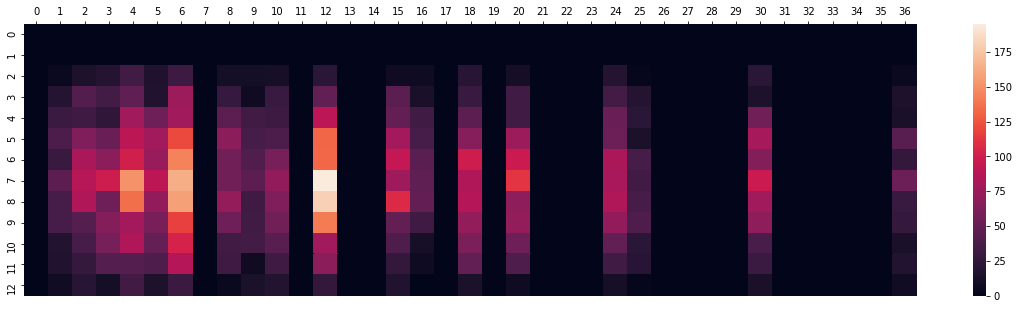

In [5]:
###########################
# Conditional Distribution
###########################
prob_add_given_mult = df.groupby('mult')['add'].apply(list).to_dict()
prob_mult_given_add = df.groupby('add')['mult'].apply(list).to_dict()

def gibb_samples():
    x_add = np.random.choice(pdf_add.index)
    
    while True:
        x_mult = np.random.choice(prob_mult_given_add[x_add])
        yield (x_add, x_mult)

        x_add = np.random.choice(prob_add_given_mult[x_mult])
        yield (x_add, x_mult)
        
gen = gibb_samples()
simulated_samples = [next(gen)for _ in tqdm(range(int(sample_size)))]

freq = np.zeros((max(pdf_add.index) + 1, max(pdf_mult.index) + 1))
for x, y in simulated_samples:
    freq[x, y] += 1

fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(freq, ax=ax)
ax.xaxis.set_ticks_position('top')
plt.show()